In [1]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [3]:
#read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')

In [5]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)
#Let's see first 10 rows of it
wisc_emp.head()

Shape of the DataFrame: (178, 2)


,Month,Employment
0,1961-01,239.6
1,1961-02,236.4
2,1961-03,236.8
3,1961-04,241.5
4,1961-05,243.7


<IPython.core.display.Javascript object>


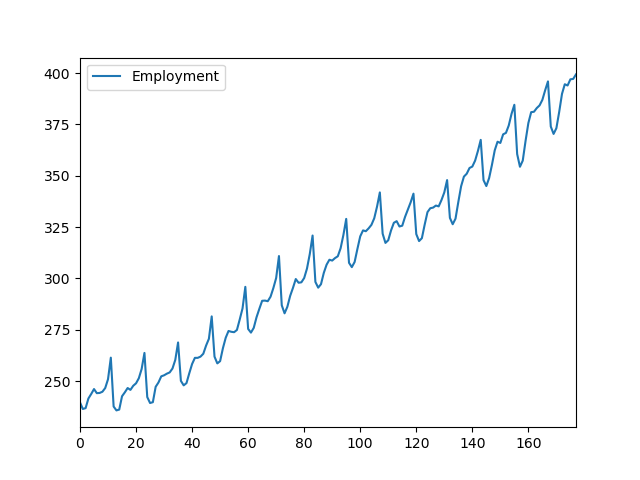

In [6]:
# plot the wisconsin employment dataset
wisc_emp.plot()

In [7]:
# Capture seasonality component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

In [8]:
initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

In [10]:
# Initialize seasonal trend
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons

In [11]:
initialize_seasonalilty(wisc_emp['Employment'], 12) 

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.403571428571445,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.22499999999998,
 8: 3.539285714285705,
 9: 6.89642857142856,
 10: 11.774999999999986,
 11: 19.410714285714267}

In [12]:
# Triple Exponential Smoothing Forecast
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

In [13]:
# Triple exponential smoothing
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)

<IPython.core.display.Javascript object>


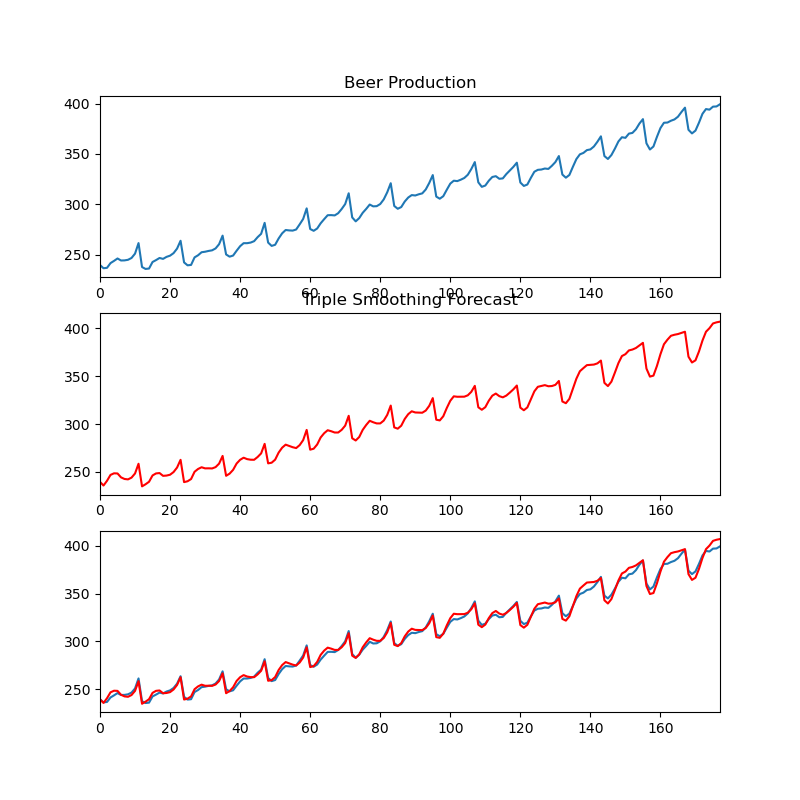

In [15]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(3,1,2)
wisc_emp['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')
# plt.savefig('plots/ch2/B07887_03_14.png', format='png', dpi=300)
ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(ax=ax)
wisc_emp['TES'].plot(ax=ax, color='r')
plt.show()